# "BSN"

In [81]:
from IPython.display import IFrame
IFrame('https://app.powerbi.com/view?r=eyJrIjoiMjQxMTRmYzUtNTgzOS00MjM4LTg2MmMtMTNhMWVhZDMyNGExIiwidCI6IjY3NGQzZTZjLTQ1ZjctNDJlOS05MzhjLWZjZDAxZTNmZjU3YyJ9&embedImagePlaceholder=true&pageName=ReportSection', width=600, height=373.5)


In [82]:
IFrame('https://app.powerbi.com/view?r=eyJrIjoiYzdlMjVhMWEtY2ZhZC00ZGMxLWE3N2EtY2RlNDg3M2FlMDkzIiwidCI6IjY3NGQzZTZjLTQ1ZjctNDJlOS05MzhjLWZjZDAxZTNmZjU3YyJ9&embedImagePlaceholder=true&pageName=ReportSection', width=600, height=373.5)


In [76]:

from IPython.display import IFrame
IFrame('https://app.powerbi.com/view?r=eyJrIjoiNjlhNzAyNjgtNmNmNC00M2ZhLWE5M2YtNDA2ZmRhNzYxZTk3IiwidCI6IjY3NGQzZTZjLTQ1ZjctNDJlOS05MzhjLWZjZDAxZTNmZjU3YyJ9', width=600, height=373.5)


In [2]:
import pandas as pd
import numpy as np
import os 
import csv

# Load the data
away = pd.read_csv('/Users/jeanzayas/Desktop/Divergence/Portfolio/Sports Analysis/Basketball/BSN/dataset/cleaned and prepped data/away.csv')
home = pd.read_csv('/Users/jeanzayas/Desktop/Divergence/Portfolio/Sports Analysis/Basketball/BSN/dataset/cleaned and prepped data/home.csv')
boxscore = pd.read_csv('/Users/jeanzayas/Desktop/Divergence/Portfolio/Sports Analysis/Basketball/BSN/dataset/cleaned and prepped data/boxscore.csv')

Now, let's check the number of rows and columns in the away DataFrame:

In [34]:
print("Number of rows and columns in 'away' DataFrame:", away.shape)
away.columns

Number of rows and columns in 'away' DataFrame: (27877, 27)


Index(['gameid_', 'Source', 'Name', 'Min', 'M', 'A', 'FG%', 'M_1', 'A_2',
       '3P%', 'M_3', 'A_4', 'FT%', 'O', 'D', 'T', 'AS', 'PF', 'TO', 'ST', 'BS',
       'PTS', 'fecha.Source.Name.1', 'fecha.Source.Name.2', 'fecha.Day',
       'fecha.Time', 'fecha.AM:PM'],
      dtype='object')

In [45]:
print("First few rows of 'away' DataFrame:")
print(boxscore.head())


First few rows of 'away' DataFrame:
    gameid_        Source      Team  Total  1Q  2Q  3Q  4Q  \
0  20211114  boxscore.csv   Bayamon    NaN NaN NaN NaN NaN   
1  20211114  boxscore.csv  Carolina    NaN NaN NaN NaN NaN   
2  20221139  boxscore.csv   Humacao    NaN NaN NaN NaN NaN   
3  20221139  boxscore.csv   Bayamon    NaN NaN NaN NaN NaN   
4  20221161  boxscore.csv   Arecibo    NaN NaN NaN NaN NaN   

   fecha.Source.Name.1 fecha.Source.Name.2                fecha.Day  \
0             20211114           fecha.csv  2021-08-30 00:00:00.000   
1             20211114           fecha.csv  2021-08-30 00:00:00.000   
2             20221139           fecha.csv  2022-04-25 00:00:00.000   
3             20221139           fecha.csv  2022-04-25 00:00:00.000   
4             20221161           fecha.csv  2022-06-16 00:00:00.000   

                fecha.Time fecha.AM:PM  
0  1899-12-30 08:00:00.000          PM  
1  1899-12-30 08:00:00.000          PM  
2  1899-12-30 08:00:00.000          PM  


# "What are the correlations between team statistics and winning percentages?"

To answer this question, I first need to calculate the winning percentage for each team in each game. By comparing the total points scored by each team and determining which team scored more points. If a team scored more points, we assign them a winning percentage of 1. If a team scored fewer points, we assign them a winning percentage of 0. If both teams scored the same number of points, we assign each team a winning percentage of 0.5.

Once we have the winning percentage for each team in each game, we can calculate the correlation between the winning percentage and each team statistic. 


In [35]:
# Merge the away and home dataframes
games = pd.merge(away, home, on='gameid_', suffixes=('_away', '_home'))

# Merge the boxscore dataframe
games = pd.merge(games, boxscore, on='gameid_')
#print(games.columns)

# Calculate winning percentage for each team in each game
games['away_win'] = np.where(games['PTS_away'] > games['PTS_home'], 1, 0)
games['home_win'] = np.where(games['PTS_home'] > games['PTS_away'], 1, 0)
games['winning_percentage_away'] = games['away_win'] / (games['away_win'] + games['home_win'])
games['winning_percentage_home'] = games['home_win'] / (games['away_win'] + games['home_win'])

# Calculate correlations between winning percentage and team statistics
correlations_away = games.drop(['gameid_', 'fecha.Source.Name.1', 'fecha.Day', 'fecha.Time', 'fecha.AM:PM', 'away_win', 'home_win', 'Min_away', 'winning_percentage_home'], axis=1).corrwith(games['winning_percentage_away'])
correlations_home = games.drop(['gameid_', 'fecha.Source.Name.1', 'fecha.Day', 'fecha.Time', 'fecha.AM:PM', 'away_win', 'home_win', 'Min_away', 'winning_percentage_away'], axis=1).corrwith(games['winning_percentage_home'])

# Print correlations
print('Correlations with winning percentage for away team:')
print(correlations_away)
print()
print('Correlations with winning percentage for home team:')
print(correlations_home)
print('This is games.columns')
games

/var/folders/nx/50qt6bg15q70844qzhxhmsmm0000gn/T/ipykernel_14868/189898050.py:15: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_away = games.drop(['gameid_', 'fecha.Source.Name.1', 'fecha.Day', 'fecha.Time', 'fecha.AM:PM', 'away_win', 'home_win', 'winning_percentage_home'], axis=1).corrwith(games['winning_percentage_away'])
/var/folders/nx/50qt6bg15q70844qzhxhmsmm0000gn/T/ipykernel_14868/189898050.py:16: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_home = games.drop(['gameid_', 'fecha.Source.Name.1', 'fecha.Day', 'fecha.Time', 'fecha.AM:PM', 'away_win', 'home_win', 'winning_percentage_away'], axis=1).corrwith(ga

Correlations with winning percentage for away team:
M_away                      0.416618
A_away                      0.401442
FG%_away                    0.324918
M_1_away                    0.380625
A_2_away                    0.373807
3P%_away                    0.287151
M_3_away                    0.383515
A_4_away                    0.382333
FT%_away                    0.384627
O_away                      0.331167
D_away                      0.370229
T_away                      0.371917
AS_away                     0.345305
PF_away                     0.330344
TO_away                     0.341269
ST_away                     0.320807
BS_away                     0.263893
PTS_away                    0.433930
fecha.Source.Name.1_away   -0.000015
M_home                     -0.410440
A_home                     -0.394674
FG%_home                   -0.311085
M_1_home                   -0.373374
A_2_home                   -0.367403
3P%_home                   -0.272870
M_3_home               

,gameid_,Source_away,Name_away,Min_away,M_away,A_away,FG%_away,M_1_away,A_2_away,3P%_away,...,4Q,fecha.Source.Name.1,fecha.Source.Name.2,fecha.Day,fecha.Time,fecha.AM:PM,away_win,home_win,winning_percentage_away,winning_percentage_home
0,20191022,away.csv,Totals:,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,20191022,fecha.csv,2019-03-14 00:00:00.000,1899-12-30 08:00:00.000,PM,0,0,NaN,NaN
1,20191022,away.csv,Totals:,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,20191022,fecha.csv,2019-03-14 00:00:00.000,1899-12-30 08:00:00.000,PM,0,0,NaN,NaN
2,20191022,away.csv,Totals:,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,20191022,fecha.csv,2019-03-14 00:00:00.000,1899-12-30 08:00:00.000,PM,0,0,NaN,NaN
3,20191022,away.csv,Totals:,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,20191022,fecha.csv,2019-03-14 00:00:00.000,1899-12-30 08:00:00.000,PM,0,0,NaN,NaN
4,20191022,away.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,20191022,fecha.csv,2019-03-14 00:00:00.000,1899-12-30 08:00:00.000,PM,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677879,20101055,away.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.0,20101055,fecha.csv,2010-04-04 00:00:00.000,1899-12-30 08:00:00.000,PM,0,0,NaN,NaN
677880,20101055,away.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.0,20101055,fecha.csv,2010-04-04 00:00:00.000,1899-12-30 08:00:00.000,PM,0,0,NaN,NaN
677881,20101055,away.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.0,20101055,fecha.csv,2010-04-04 00:00:00.000,1899-12-30 08:00:00.000,PM,0,0,NaN,NaN
677882,20101055,away.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.0,20101055,fecha.csv,2010-04-04 00:00:00.000,1899-12-30 08:00:00.000,PM,0,0,NaN,NaN


To start, we can use the describe() method to compute summary statistics for each variable in our dataset:

In [23]:

#games.rename(columns={'old_name': 'new_name'}, inplace=True)
games.rename(columns={'M_away': '2ptsM_away',
                      'A_away': '2ptsA_away',
                      'M_1_away':'3ptsM_away',
                      'A_2_away': '3ptsA_away',
                      'M_3_away': 'FTM_away',
                      'A_4_away': 'FTA_away',
                      'M_home': '2ptsM_home',
                      'A_home': '2ptsA_home',
                      'M_1_home': '3ptsM_home',
                      'A_2_home': '3ptsA_home',
                      'M_3_home': 'FTM_home',
                      'A_4_home': 'FTA_home'}, inplace=True)
print(games.describe())
#games.columns

            gameid_     2ptsM_away     2ptsA_away       FG%_away  \
count  6.778840e+05  622554.000000  622554.000000  622554.000000   
mean   2.015722e+07       4.104242       7.903610       0.423638   
std    4.067204e+04       6.549778      12.311856       0.321281   
min    2.008100e+07       0.000000       0.000000       0.000000   
25%    2.013101e+07       0.000000       1.000000       0.000000   
50%    2.015126e+07       2.000000       4.000000       0.500000   
75%    2.019105e+07       4.000000       8.000000       0.640000   
max    2.023122e+07      41.000000      75.000000       1.000000   

          3ptsM_away     3ptsA_away       3P%_away       FTM_away  \
count  622554.000000  622554.000000  622554.000000  622554.000000   
mean        1.462511       4.074120       0.222746       2.555550   
std         2.614821       6.611246       0.287434       4.513477   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

## Describe() results

This table is showing:
 - **count**: The total number of values.

 - **mean**: This is the average value for that set of numbers.

 - **standard deviation**: Measures how spread out the values are. A small number here indicates that thevalues are close to the mean,while a large number is more spread out. 

 - **minimum**: The smallest value in a set.

 - **25th percentile**: The first quartile, is a value that divides the data into four equal parts, where 25% of the values are less than or equal to the 25th percentile. 

 - **median**: The second quartile, is the value that divides the data into two equal parts, where 50% of the values are less than or equal to the median. 

 - **75th percentile**: The third quartile, is a value that divides the data into four equal parts, where 75% of the values are less than or equal to the 75th percentile. 
 
 - **maximum values**: is the highest value in the dataset
 for each numeric variable in our dataset.

To visualize the distribution of each variable, we can use histograms for numeric variables and bar charts for categorical variables. For example, we can create a histogram of the PTS_away variable using the hist() method:

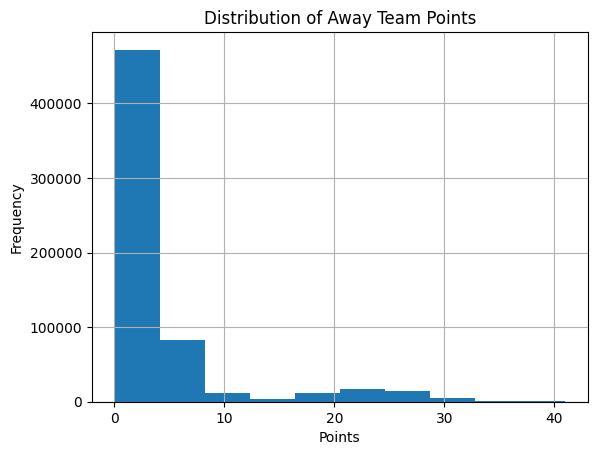

In [14]:
import matplotlib.pyplot as plt

games['2ptsM_away'].hist()
plt.title('Distribution of Away Team Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()





To compute correlations between each pair of variables and visualize them using a heatmap, we can use the corr() method and the heatmap() function from the Seaborn library:

/var/folders/nx/50qt6bg15q70844qzhxhmsmm0000gn/T/ipykernel_14868/3446869240.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = games.corr()


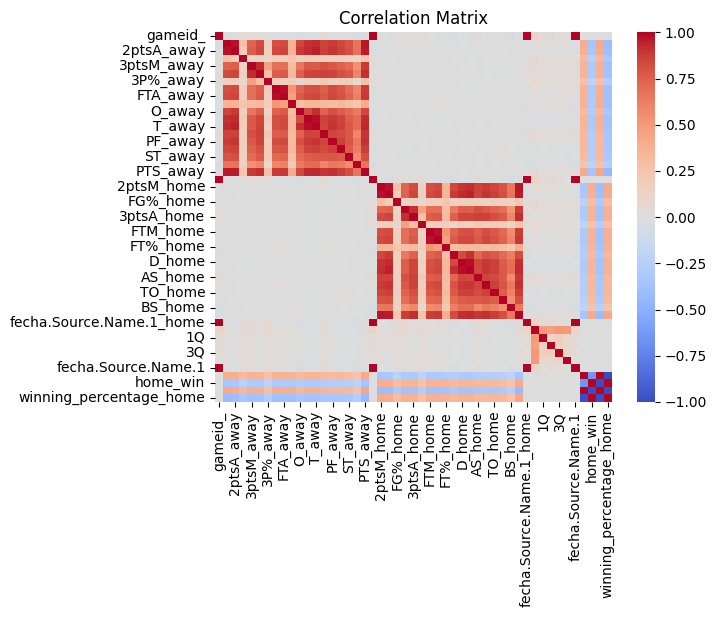

In [9]:
import seaborn as sns
corr_matrix = games.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


This will output a heatmap showing the correlation between each pair of variables in our dataset. The darker the color, the stronger the correlation. We can also use the annot=True parameter to show the correlation coefficients in each cell of the heatmap.

After computing the correlations, we can identify the variables that are highly correlated with winning percentages by looking for variables with a high absolute correlation coefficient. We can also visualize the correlations between the winning percentage and other variables using a scatter plot. For example, we can create a scatter plot of the PTS_away variable against the winning_percentage_away variable using the scatter() method:

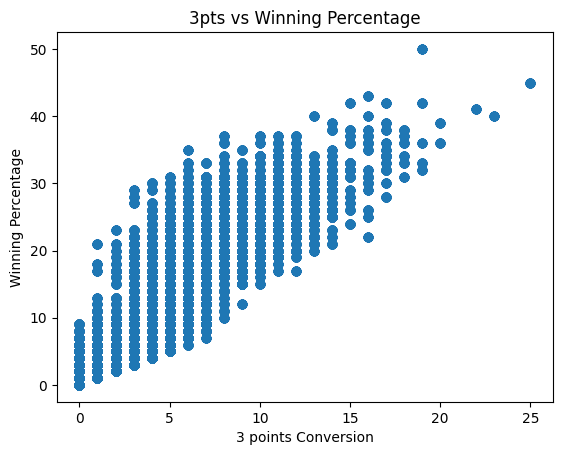

In [28]:
plt.scatter(games['3ptsM_away'], games['3ptsA_away'])
plt.title('3pts vs Winning Percentage')
plt.xlabel('3 points Conversion')
plt.ylabel('Winning Percentage')
plt.show()



This is a scatter plot showing the relationship between the 3pts Made and missed and the winning_percentage_away variable.

 In the case of our basketball dataset, we need create a new variable by calculating the difference in points between the home team and the away team. This variable may be a strong predictor of winning percentage, as teams that score more points than their opponents are more likely to win.

To create this new variable, we can subtract the 'PTS_away' column from the 'PTS_home' column:

In [40]:
games['point_diff'] = games['PTS_home'] - games['PTS_away']
games.point_diff

0         0.0
1         0.0
2         NaN
3         NaN
4         NaN
         ... 
677879    NaN
677880    NaN
677881    NaN
677882    NaN
677883    NaN
Name: point_diff, Length: 677884, dtype: float64

## **Distribution of Point Differential and Mean**
- In the first plot, the red dashed line represents the mean of the point differential, which is -0.60. This means that, on average, the home team loses by 0.60 points.


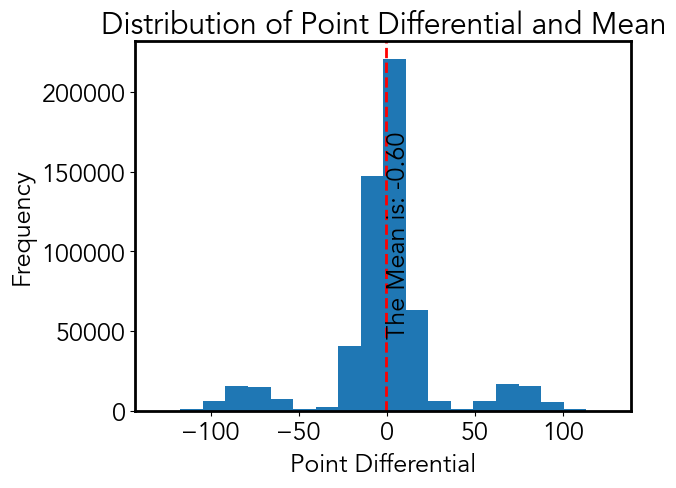

In [68]:
import matplotlib.pyplot as plt

# Create histogram of point_diff
plt.hist(games['point_diff'], bins=20)

# Add a vertical line at the mean of point_diff
plt.axvline(games['point_diff'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.text(games['point_diff'].mean(), 50000, f'The Mean is: {games["point_diff"].mean():.2f}', rotation=90)

# Add labels and title
plt.xlabel('Point Differential')
plt.ylabel('Frequency')
plt.title('Distribution of Point Differential and Mean')
plt.show()

## **Distribution of Point Differential and Standard Deviation**
- In the second plot, the red dashed line represents the standard deviation of the point differential, which is 32.38. This means that the point differential in the games is quite spread out, with most values falling within plus or minus 32.38 points from the mean.

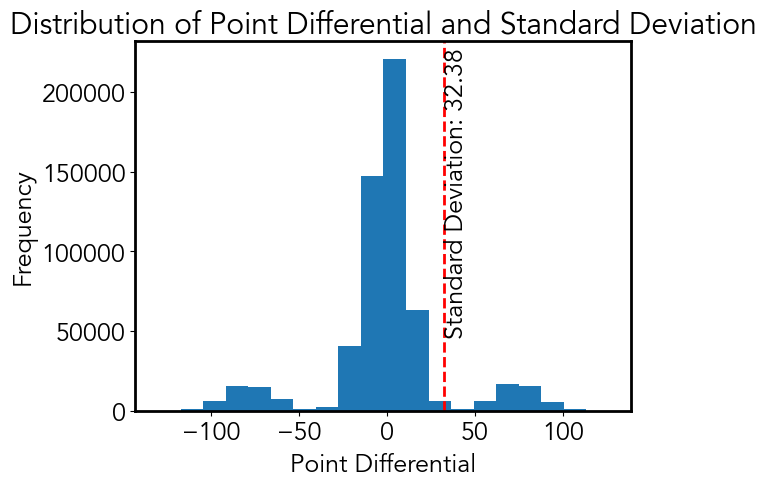

In [69]:
import matplotlib.pyplot as plt

# Create histogram of point_diff
plt.hist(games['point_diff'], bins=20)

# Add a vertical line at the mean of point_diff
plt.axvline(games['point_diff'].std(), color='red', linestyle='dashed', linewidth=2)
plt.text(games['point_diff'].std(), 50000, f'Standard Deviation: {games["point_diff"].std():.2f}', rotation=90)

# Add labels and title
plt.xlabel('Point Differential')
plt.ylabel('Frequency')
plt.title('Distribution of Point Differential and Standard Deviation')
plt.show()


In [73]:


print(games.columns)

Index(['gameid_', 'Source_away', 'Name_away', 'Min_away', '2ptsM_away',
       '2ptsA_away', 'FG%_away', '3ptsM_away', '3ptsA_away', '3P%_away',
       'FTM_away', 'FTA_away', 'FT%_away', 'O_away', 'D_away', 'T_away',
       'AS_away', 'PF_away', 'TO_away', 'ST_away', 'BS_away', 'PTS_away',
       'fecha.Source.Name.1_away', 'fecha.Source.Name.2_away',
       'fecha.Day_away', 'fecha.Time_away', 'fecha.AM:PM_away', 'Source_home',
       'Name_home', 'Min_home', '2ptsM_home', '2ptsA_home', 'FG%_home',
       '3ptsM_home', '3ptsA_home', '3P%_home', 'FTM_home', 'FTA_home',
       'FT%_home', 'O_home', 'D_home', 'T_home', 'AS_home', 'PF_home',
       'TO_home', 'ST_home', 'BS_home', 'PTS_home', 'fecha.Source.Name.1_home',
       'fecha.Source.Name.2_home', 'fecha.Day_home', 'fecha.Time_home',
       'fecha.AM:PM_home', 'Source', 'Team', 'Total', '1Q', '2Q', '3Q', '4Q',
       'fecha.Source.Name.1', 'fecha.Source.Name.2', 'fecha.Day', 'fecha.Time',
       'fecha.AM:PM', 'away_win', 'home_wi

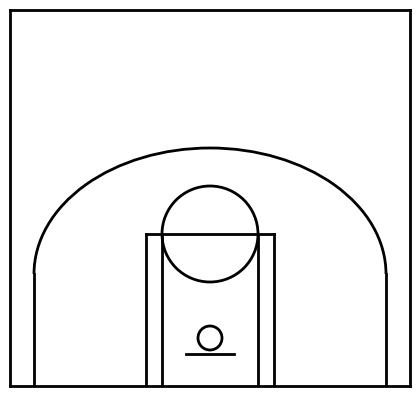

In [59]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

def create_court(ax, color):
    
    # Short corner 3pt lines 
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
 #3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    
 # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    
# Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    
# Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
   # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
# Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')



plt.show()


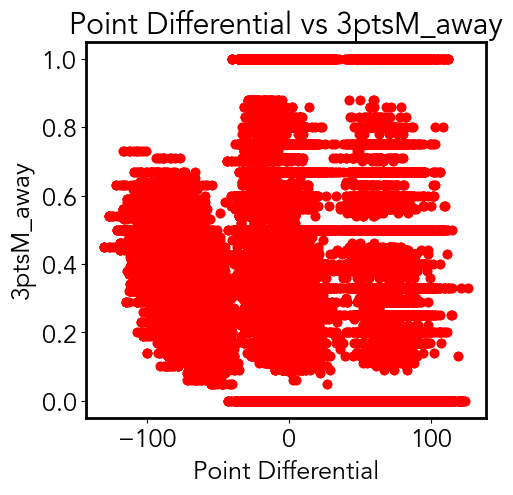

In [75]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl

def create_court(ax, color):
    # court drawing code here

    return ax

# Draw basketball court
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')

# Create scatter plot of point_diff against 3ptsM_away on top of the court
ax.scatter(games['point_diff'], games['3P%_away'], color='red')

# Add labels and title
plt.xlabel('Point Differential')
plt.ylabel('3ptsM_away')
plt.title('Point Differential vs 3ptsM_away')

plt.show()
